<h2>Loading Necessary Libraries</h2>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

<h2>Loading the data</h2>

In [85]:
data=pd.read_csv('Iris.csv')

In [86]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<h2>Checking For missing values</h2>

In [89]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h2>Scatter Plots</h2>

Text(0.5, 1.0, 'Plot Between Petal Width and Petal Length')

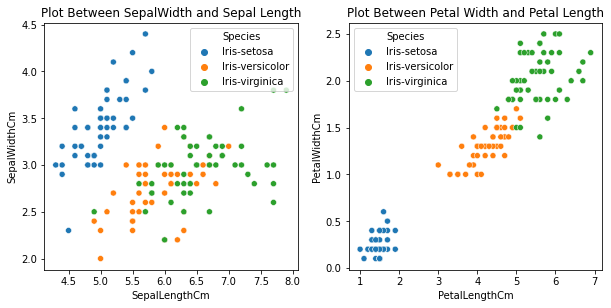

In [90]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
ax1=sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
ax1.set_title('Plot Between SepalWidth and Sepal Length')
plt.subplot(2,2,2)
ax2=sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species')
ax2.set_title('Plot Between Petal Width and Petal Length')

<h2>Defining the Dependent and Independent Features</h2>

In [91]:
X=data.iloc[:,1:5]
y=data.iloc[:,-1]

<h2>Train Test split</h2>

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

<h2>Standardising Using standard scaler</h2>

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<h2>Random Forest Classifier</h2>

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [122]:
clf=DecisionTreeClassifier()

In [123]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [124]:
clf.score(X_test,y_test)

0.9666666666666667

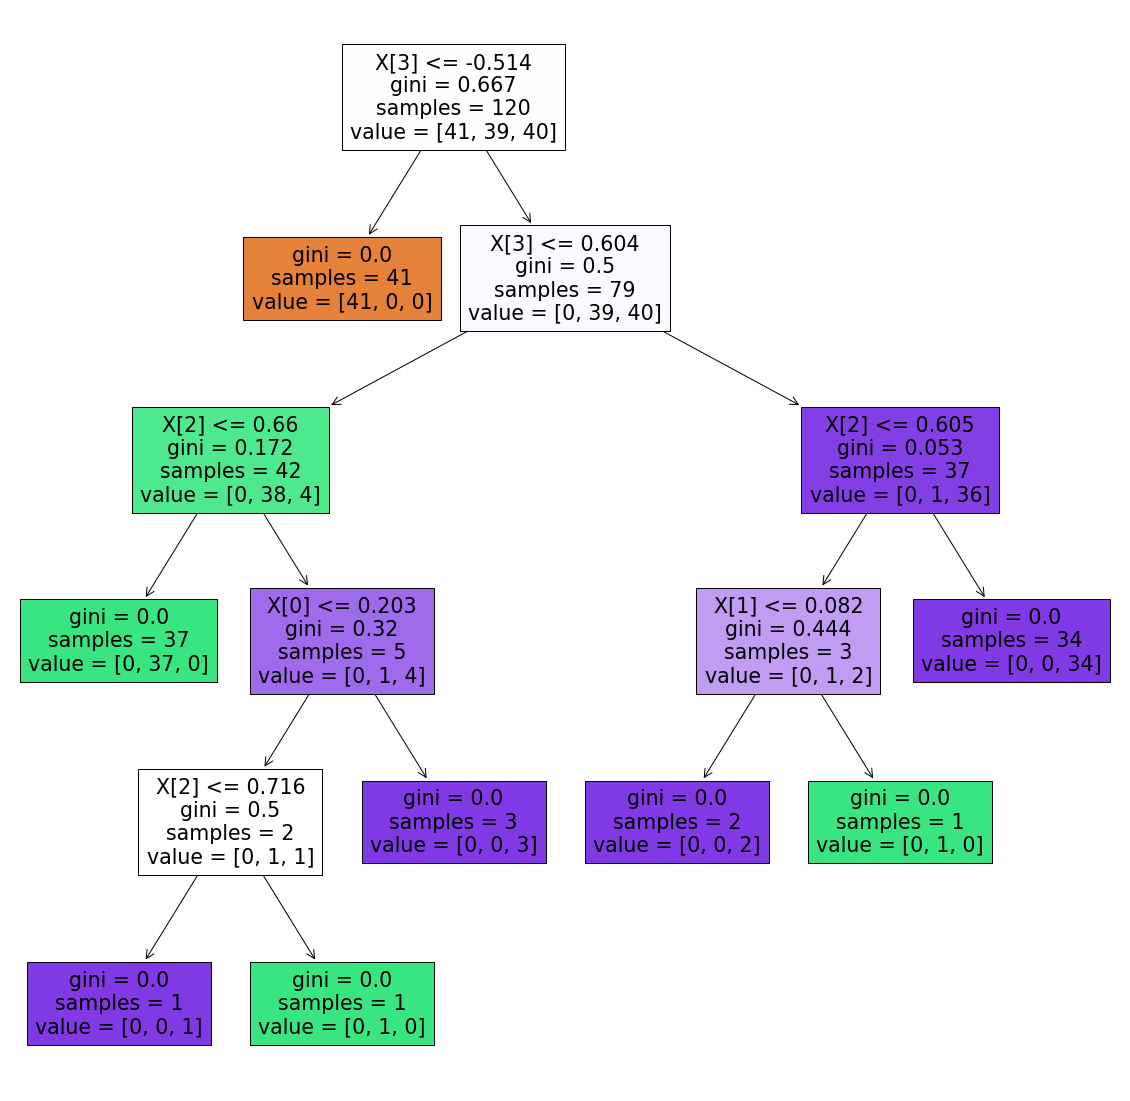

In [128]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)
plt.show()

<h2>Confusion Matrix</h2>

In [100]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [101]:
y_pred=clf.predict(X_test)

In [102]:
cm=confusion_matrix(y_test,y_pred)

In [82]:
cm

array([[ 0,  0,  7],
       [ 0,  0, 17],
       [ 0,  0,  6]], dtype=int64)